# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.io import boreholes_from_files, striplog_from_text,gdf_viewer,\
files_read, striplog_from_df
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 

import matplotlib.pyplot as plt
from os import remove
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

## Reading of CSV files in a dir

In [2]:
fdir=ROOT_DIR+'/CF_data/synthese/Result_traitem/'
cols=['ID','X','Y','Z','Long','Diam']
crit='Long'

In [3]:
df_all=files_read(fdir, crit, cols)

criteria column not found in file 1 headers : extraction cancelled !
criteria column not found in file 2 headers : extraction cancelled !
-->  boreholes_9.csv (330lines)
-->  boreholes_4.csv (38lines)
criteria column not found in file 5 headers : extraction cancelled !
-->  boreholes_5.csv (155lines)
-->  boreholes_3.csv (97lines)
-->  boreholes_Leve_Z_Pilote.csv (72lines)
criteria column not found in file 9 headers : extraction cancelled !
criteria column not found in file 10 headers : extraction cancelled !
-->  boreholes_2.csv (322lines)
-->  boreholes_1geom.csv (316lines)

 The overall dataframe contains 1330 lines. 7 files used


In [4]:
striplog_from_df(df_all[:5])

{'1': Striplog(1 Intervals, start=0.0, stop=3.0),
 '2': Striplog(1 Intervals, start=0.0, stop=3.0),
 '3': Striplog(1 Intervals, start=0.0, stop=3.0),
 '4': Striplog(1 Intervals, start=0.0, stop=3.0),
 '5': Striplog(1 Intervals, start=0.0, stop=3.0)}

In [5]:
gdf_viewer(df_all)

Rows : 1330, columns : 7


interactive(children=(IntSlider(value=10, description='rows', max=1330, min=10, readout=False), IntSlider(valu…

In [6]:
df_all.query('ID=="1"')

,ID,X,Y,Z,Long,Diam,geometry
0,1,153124.071,122653.382,101.983,8.0,NaN,POINT (153124.071 122653.382)
368,1,153124.071,122653.382,102.622,NaN,NaN,POINT (153124.071 122653.382)


In [7]:
dist_crit=1

a=0
for i in range(0,len(df_all)-1):
    d=df_all.loc[i, 'geometry'].distance(df_all.loc[i+1, 'geometry'])
    if d<dist_crit or d>1e+4:
        a+=1
        #print(f"{df_all.loc[i,'ID']} <-> {df_all.loc[i+1,'ID']} : {d:.2} meters")
print('\n',f'{a}/{len(df_all)} elements with bad XY')


 204/1330 elements with bad XY


In [8]:
import random
# the idea below can be used to build a french lexicon or select color/hatches from a list
test=df_all[:5].copy()
test['Litho']=''
l=['sand', 'clay', 'limestone', 'coal'] #funny random lithology :)
c=['white','red', 'blue', 'black'] 
test['Litho']=test['Litho'].apply(lambda x:random.sample(c,1)[0]+' '+random.sample(l,1)[0])

In [9]:
test=test.append({'ID':'1','X':153124.071,'Y':122653.382,'Z':101.983, 'Long':10, 'Litho':'blue limestone'}, ignore_index=True)
test

,ID,X,Y,Z,Long,Diam,geometry,Litho
0,1,153124.071,122653.382,101.983,8.0,NaN,POINT (153124.071 122653.382),white sand
1,2,153112.310,122638.420,102.088,7.4,NaN,POINT (153112.310 122638.420),blue sand
2,3,153140.851,122640.352,101.681,7.7,NaN,POINT (153140.851 122640.352),red clay
3,4,153117.456,122613.842,101.884,8.0,NaN,POINT (153117.456 122613.842),white coal
4,5,153139.423,122613.839,101.405,7.5,NaN,POINT (153139.423 122613.839),black coal
5,1,153124.071,122653.382,101.983,10.0,NaN,None,blue limestone


## Create Boreholes from dataframes or files

In [10]:
bhs_dict = {'F1':ROOT_DIR+'/data/test.csv'}#'/data/test.las'}#, 'F2':ROOT_DIR+'/data/test.csv'} # boreholes to insert into the db
bhs_df=[df_all]

In [11]:
boreholes, components= boreholes_from_files(bhs_df, verbose=False)#, x=list(df_all.X), y=list(df_all.Y), verbose=False)


Datraframe 0 processing...

End of the process : 810 unique ID found


In [12]:
boreholes

[<core.orm.BoreholeOrm>(id=1, length=8.0, diameter=nan, intervals=2),
 <core.orm.BoreholeOrm>(id=2, length=7.4, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=3, length=7.7, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=4, length=8.0, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=5, length=7.5, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=6, length=7.0, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=7, length=8.2, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=8, length=7.0, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=9, length=1.2, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=10, length=7.0, diameter=nan, intervals=2),
 <core.orm.BoreholeOrm>(id=11, length=6.0, diameter=nan, intervals=2),
 <core.orm.BoreholeOrm>(id=12, length=4.6, diameter=nan, intervals=3),
 <core.orm.BoreholeOrm>(id=13, length=8.4, diameter=nan, intervals=2),
 <core.orm.BoreholeOrm>(id=19, length=4.6, diameter=nan, intervals=1),
 <core.orm.Bore

In [13]:
len(boreholes), len(components)

(810, 1)

## Display the striplog and 3D view

In [14]:
bh3d = Borehole3D(name='F_test',length=10)#, legend=legend )

No given legend or incorrect format ! A default legend will be used
No intervals given, pay attention that default interval is actually used !

Borehole geometry created successfully !


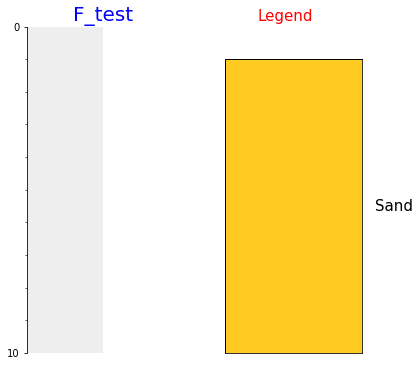

In [15]:
bh3d.log_plot()

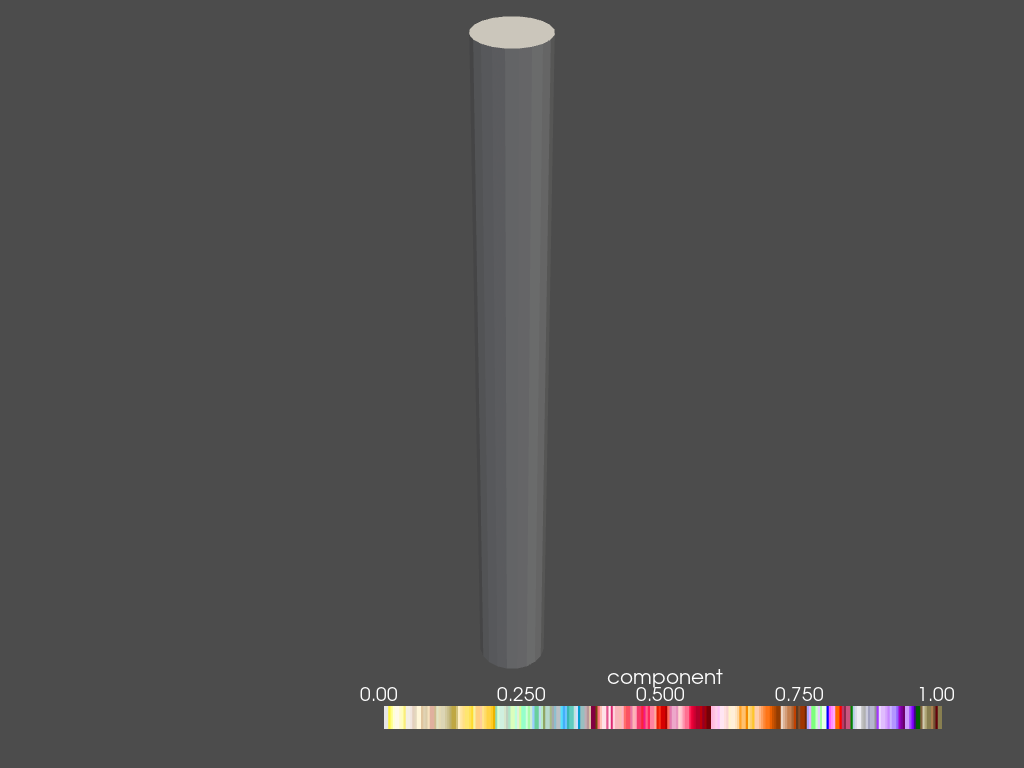

In [16]:
bh3d.plot3d()

### Display project boreholes

In [17]:
remove('tmp_files/tfe_orm_db.db')

In [18]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [19]:
Base.metadata.create_all(engine)

2021-03-12 14:09:07,205 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-03-12 14:09:07,207 INFO sqlalchemy.engine.base.Engine ()
2021-03-12 14:09:07,208 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-03-12 14:09:07,208 INFO sqlalchemy.engine.base.Engine ()
2021-03-12 14:09:07,209 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Boreholes")
2021-03-12 14:09:07,210 INFO sqlalchemy.engine.base.Engine ()
2021-03-12 14:09:07,211 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Boreholes")
2021-03-12 14:09:07,211 INFO sqlalchemy.engine.base.Engine ()
2021-03-12 14:09:07,212 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Positions")
2021-03-12 14:09:07,212 INFO sqlalchemy.engine.base.Engine ()
2021-03-12 14:09:07,213 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Positions")
2021-03-12 14:09:07,213 INFO sqlalchemy.engine.base.Engine ()
2021-03-12

In [20]:
Session = sessionmaker(bind=engine)
session = Session()

In [21]:
p = Project(session)
p.add_components(components)

2021-03-12 14:09:07,263 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-12 14:09:07,264 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-12 14:09:07,264 INFO sqlalchemy.engine.base.Engine ()
2021-03-12 14:09:07,267 INFO sqlalchemy.engine.base.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-03-12 14:09:07,267 INFO sqlalchemy.engine.base.Engine (0, 'Sand, white')
2021-03-12 14:09:07,268 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-12 14:09:07,272 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-12 14:09:07,273 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-12 14:09:07,274 INFO sqlalchemy.engine.base.Engine ()


Add boreholes into the project

In [22]:
for bh in boreholes[:5]:
    p.add_borehole(bh)

2021-03-12 14:09:07,285 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-12 14:09:07,286 INFO sqlalchemy.engine.base.Engine ('1', 8.0, nan)
2021-03-12 14:09:07,289 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-12 14:09:07,290 INFO sqlalchemy.engine.base.Engine ((0, 0.0, 0.0, 0.0, 153124.071, 122653.382), (1, 3.0, 3.0, 3.0, 153124.071, 122653.382), (2, 0.0, 0.0, 0.0, 153124.071, 122653.382), (3, 3.0, 3.0, 3.0, 153124.071, 122653.382))
2021-03-12 14:09:07,292 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-12 14:09:07,293 INFO sqlalchemy.engine.base.Engine ((0, '1', 0, 'white sand', 0, 1), (1, '1', 1, 'white sand', 2, 3))
2021-03-12 14:09:07,294 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-12 14:09:07,297 INFO sqlalchemy.engine.base.Engine BE

2021-03-12 14:09:07,422 INFO sqlalchemy.engine.base.Engine (6,)
2021-03-12 14:09:07,423 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-12 14:09:07,424 INFO sqlalchemy.engine.base.Engine (7,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-12 14:09:07,465 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-12 14:09:07,465 INFO sqlalchemy.engine.base.Engine ((8, 0.0, 0.0, 0.0, 153117.456, 122613.842), (9, 3.0, 3.0, 3.0, 153117.456, 122613.842))
2021-03-12 14:09:07,467 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-12 14:09:07,467 INFO

In [23]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-03-12 14:09:07,588 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-12 14:09:07,589 INFO sqlalchemy.engine.base.Engine (3.0, '5')
2021-03-12 14:09:07,590 INFO sqlalchemy.engine.base.Engine COMMIT
Boreholes in the project :  5


In [24]:
p.boreholes

2021-03-12 14:09:07,601 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-12 14:09:07,602 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-12 14:09:07,603 INFO sqlalchemy.engine.base.Engine ('1',)
2021-03-12 14:09:07,605 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-12 14:09:07,606 INFO sqlalchemy.engine.base.Engine ('1',)
2021-03-12 14:09:07,608 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "B

[<core.orm.BoreholeOrm>(id=1, length=3.0, diameter=None, intervals=2),
 <core.orm.BoreholeOrm>(id=2, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=3, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=4, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=5, length=3.0, diameter=None, intervals=1)]

In [25]:
p.refresh(verbose=True)

2021-03-12 14:09:07,630 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-12 14:09:07,632 INFO sqlalchemy.engine.base.Engine ()


In [26]:
session.close()

2021-03-12 14:09:07,635 INFO sqlalchemy.engine.base.Engine ROLLBACK


In [27]:
p.boreholes_3d[0]

Striplog(2 Intervals, start=0.0, stop=3.0)

### The Borehole in 3D using X3D for interaction within the notebook

In [28]:
p.plot3d(x3d=True)

##  ==================Zone Brouillon==================

#### Codes qui peuvent aider si besoin (Brouillon)